In [1]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Conv3D, Dense, Flatten, GlobalAveragePooling2D, Conv2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import matplotlib.font_manager as fm

In [4]:
h5f = h5py.File('D:/total_data_ro.h5','r')

In [5]:
data = h5f['total_2017'][:]
gen_data = h5f['gen_2017'][:]
h5f.close()

In [7]:
data.shape, gen_data.shape

((4416, 10, 75, 75), (4416,))

### LSTM 용 (출력 1 frame)

In [48]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback, data.shape[-3], data.shape[-2], data.shape[-1]))
        targets = np.zeros((len(rows), data.shape[-3], data.shape[-2], data.shape[-1]))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j])
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [49]:
for i, j in generator(data, 10, 1, 0, None, shuffle=True, batch_size=5):
    print(i.shape, j.shape)


(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75, 75) (5, 7, 75, 75)
(5, 10, 7, 75,

KeyboardInterrupt: 

### Stacked LSTM 용 (출력 1+ frame)

In [23]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback, data.shape[-3], data.shape[-2], data.shape[-1]))
        targets = np.zeros((len(rows), lookback, data.shape[-3], data.shape[-2], data.shape[-1]))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j])
            indices_target = range(rows[j] - lookback + delay, rows[j] + delay)
            samples[j] = data[indices]
            targets[j] = data[indices_target]
        yield samples, targets

In [31]:
a = np.arange(0,100)

In [41]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128):
    n=0
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while n < 10:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback))
        targets = np.zeros((len(rows), lookback))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j])
            indices_target = range(rows[j] - lookback + delay, rows[j] + delay)
            samples[j] = data[indices]
            targets[j] = data[indices_target]
        yield samples, targets
        n += 1

In [47]:
for i, j in generator(a, 10, 1, 0, None, shuffle=True, batch_size=5):
    print('i:', i, '\nj:', j)


i: [[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [77. 78. 79. 80. 81. 82. 83. 84. 85. 86.]
 [86. 87. 88. 89. 90. 91. 92. 93. 94. 95.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]] 
j: [[11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [81. 82. 83. 84. 85. 86. 87. 88. 89. 90.]
 [78. 79. 80. 81. 82. 83. 84. 85. 86. 87.]
 [87. 88. 89. 90. 91. 92. 93. 94. 95. 96.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
i: [[63. 64. 65. 66. 67. 68. 69. 70. 71. 72.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [52. 53. 54. 55. 56. 57. 58. 59. 60. 61.]
 [67. 68. 69. 70. 71. 72. 73. 74. 75. 76.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]] 
j: [[64. 65. 66. 67. 68. 69. 70. 71. 72. 73.]
 [81. 82. 83. 84. 85. 86. 87. 88. 89. 90.]
 [53. 54. 55. 56. 57. 58. 59. 60. 61. 62.]
 [68. 69. 70. 71. 72. 73. 74. 75. 76. 77.]
 [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]]
i: [[18. 19. 20. 21. 22. 23. 24. 25. 26. 27.]
 [28. 29. 30. 31. 32. 33. 34. 35. 36. 37.]
 [27. 28. 29. 30. 31. 32. 33. 34.

In [71]:
def generator(data, target, lookback, delay, min_index, max_index, shuffle=False, batch_size=128):
    n = 0
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while n < 10:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback, data.shape[-3], data.shape[-2], data.shape[-1]))
        targets = np.zeros((len(rows)))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j])
            samples[j] = data[indices]
            targets[j] = target[rows[j] + delay - 1]
        yield samples, targets
        n += 1

In [84]:
for i, j in generator(data, gen_data, 10, 0, 0, None, shuffle=True, batch_size=5):
    #print('i:', i[:, -1, 0, 0, 0], '\nj:', j)
    print(i.shape, j.shape)

(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)
(5, 10, 7, 75, 75) (5,)


In [81]:
np.where(gen_data == 10.86696)

(array([6802], dtype=int64),)

In [82]:
data[6802, 0, 0, 0]

-0.8333333333333338

In [83]:
gen_data[6802]

10.86696

# test

In [22]:
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/Malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()

In [44]:
sns.set(font=font_name)

In [20]:
point_2018 = pd.read_csv('./data/aws_2018.csv')

In [24]:
gen_2018 = pd.read_csv('./data/wind_gen.csv')

In [25]:
gen_2018['일시'] = pd.to_datetime(gen_2018['일시'])

In [26]:
min(point_2018['일시'])

'2018-01-01 01:00'

In [27]:
point_2018.columns

Index(['Unnamed: 0', '지점', '일시', '기온', '풍향', '풍속', '강수량', '현지기압', '해면기압',
       '습도'],
      dtype='object')

In [28]:
point_2018 = point_2018[['지점', '일시', '풍향', '풍속']][point_2018['지점']==885]

In [29]:
point_2018['일시'] = pd.to_datetime(point_2018['일시'])

In [30]:
point_2018 = point_2018.dropna(axis=0)

In [31]:
point_2018.head()

,지점,일시,풍향,풍속
317447,885,2018-01-01 01:00:00,323.3,1.9
317448,885,2018-01-01 02:00:00,341.3,2.0
317449,885,2018-01-01 03:00:00,34.3,0.8
317450,885,2018-01-01 04:00:00,341.9,2.4
317451,885,2018-01-01 05:00:00,350.2,1.3


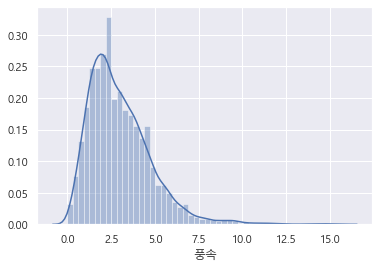

In [45]:
sns.distplot(point_2018['풍속'])

In [34]:
min(point_2018['일시']), max(point_2018['일시']), len(point_2018)

(Timestamp('2018-01-01 01:00:00'), Timestamp('2019-01-01 00:00:00'), 8581)

In [35]:
wind_2018 = gen_2018[(gen_2018['일시'] > pd.Timestamp('2018-01-01T01')) & (gen_2018['일시'] <= pd.Timestamp('2019-01-01T01'))]
min(wind_2018['일시']), max(wind_2018['일시']), wind_2018.shape

(Timestamp('2018-01-01 02:00:00'), Timestamp('2019-01-01 01:00:00'), (8760, 3))

In [36]:
data = pd.merge(point_2018, wind_2018[['일시', '발전량']], on='일시')

In [37]:
data['FE'] = data['풍향'] * data['풍속']

In [38]:
data.head()

,지점,일시,풍향,풍속,발전량,FE
0,885,2018-01-01 02:00:00,341.3,2.0,7.62216,682.60
1,885,2018-01-01 03:00:00,34.3,0.8,10.04856,27.44
2,885,2018-01-01 04:00:00,341.9,2.4,16.02960,820.56
3,885,2018-01-01 05:00:00,350.2,1.3,17.30424,455.26
4,885,2018-01-01 06:00:00,6.1,2.7,12.72528,16.47


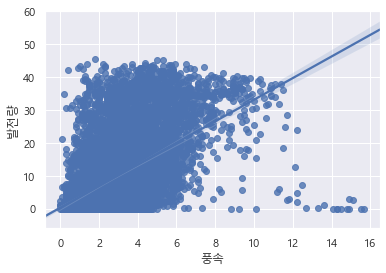

In [46]:
sns.regplot(data['풍속'], data['발전량'])

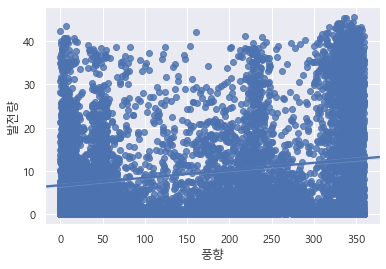

In [47]:
sns.regplot(data['풍향'], data['발전량'])

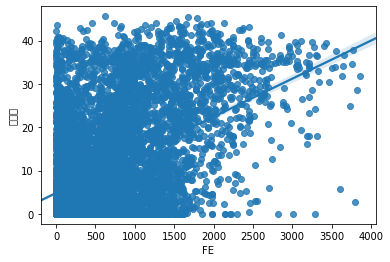

In [127]:
sns.regplot(data['FE'], data['발전량'])

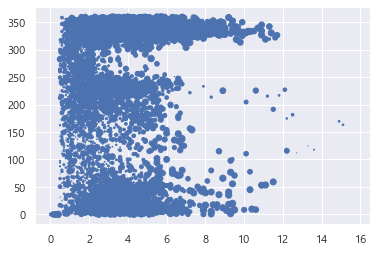

In [48]:
plt.scatter(data['풍속'], data['풍향'], data['발전량'])

In [145]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(data[['풍속', '풍향']], data['발전량'])

In [146]:
lr = LinearRegression().fit(X_train, y_train)

In [147]:
lr.coef_

array([3.2591203 , 0.01386052])

In [136]:
lr.score(X_test, y_test)

0.2984281791342487

In [137]:
lr.score(X_train, y_train)

0.29385099177458596

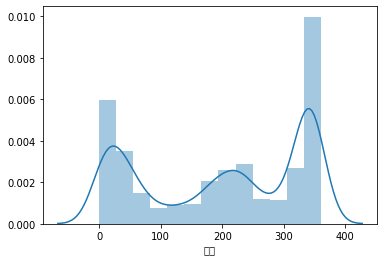

In [139]:
sns.distplot(data['풍향'])

C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bigBro\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0, flags=flags)


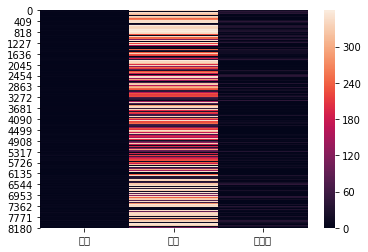

In [141]:
sns.heatmap(data[['풍속', '풍향', '발전량']])

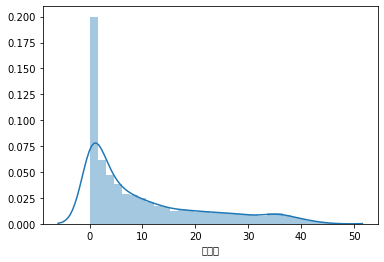

In [140]:
sns.distplot(data['발전량'])

In [8]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        samples = np.zeros((len(rows), lookback, data.shape[-3], data.shape[-2], data.shape[-1]))
        targets = np.zeros((len(rows), data.shape[-3], data.shape[-2], data.shape[-1]))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j])
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay]
        return samples, targets

In [11]:
X_test, y_test = generator(data, 72, 0, 0, None, shuffle=False, batch_size=2)

In [12]:
X_test.shape, y_test.shape

((2, 72, 10, 75, 75), (2, 10, 75, 75))

In [13]:
X_test[0][-1][0][:][:].shape

(75, 75)

In [14]:
y_test[0][0][:][:].shape

(75, 75)

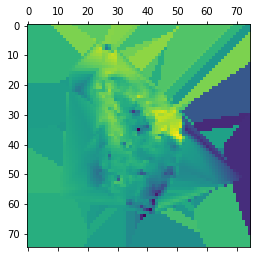

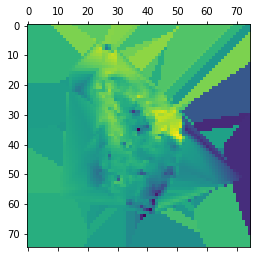

In [17]:
plt.matshow(X_test[1][-1][0][:][:])
plt.matshow(y_test[0][0][:][:])

In [18]:
X_test[1][-1][0][:][:] == y_test[0][0][:][:]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])